In [3]:
import numpy as np
import os
from PIL import Image
import imageio
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [4]:
class_a = np.load('class_a.npy')
class_a.shape

(1000, 40, 60)

In [5]:
class_b = np.load('class_b.npy')
class_b.shape

(1000, 40, 60)

In [6]:
class_test = np.load('field.npy')
class_test.shape

(200, 40, 60)

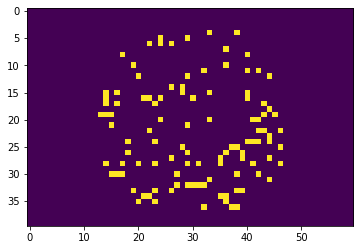

In [7]:
plt.imshow(class_a[33].reshape(40, 60))

In [8]:
classa_y = np.zeros(1000)
classb_y = np.ones(1000)
yyy = np.ones(200)

In [9]:
X = np.concatenate((class_a,class_b), axis=0)
Y = np.concatenate((classa_y,classb_y), axis=0).reshape(X.shape[0])
X.shape

(2000, 40, 60)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(40, 60)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1700/1700 [==============================] - 0s 267us/step - loss: 0.3882 - accuracy: 0.9000
Epoch 2/5
1700/1700 [==============================] - 0s 235us/step - loss: 0.0117 - accuracy: 1.00000s - loss: 0.0188 - ac
Epoch 3/5
1700/1700 [==============================] - 0s 234us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 4/5
1700/1700 [==============================] - 0s 232us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/5
1700/1700 [==============================] - 0s 246us/step - loss: 0.0019 - accuracy: 1.0000


In [22]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy of this model: {}%".format(test_acc*100))

Accuracy of this model: 100.0%


In [23]:
predictions = model.predict(class_test)

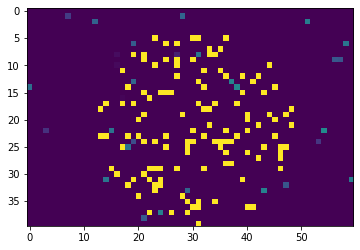

In [24]:
plt.imshow(class_test[56].reshape(40, 60))

In [25]:
if(np.argmax(predictions[56])==0):
    print("It's class A")
elif(np.argmax(predictions[56])==1):
    print("It's from class B")
else:
    print("Oops")

It's class A
